In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from comparison_functions import markdown_table
from IPython.display import Markdown
md = lambda x: display(Markdown(x))


In [3]:
import pandas as pd

import dill as pickle
import sys
from bakir.common import fasta_from_seq
output_path = None

sys.path.insert(0, 'bakir/src/bakir/')

with open('bakir/src/bakir/data/kir_db.pickle', 'rb') as f:
    anno = pickle.load(f)
db = anno[0]

In [4]:
from comparison_functions import compare_bakir_immunanot, group_annotations_by_gene, group_annotations_by_gene_immunanot, load_bakir_data, extract_immunannot_gene_features, load_and_convert_bed

In [5]:
from glob import glob
import os
import pandas as pd

# Initialize a dictionary to store DataFrames
dfs = {}

for assembly in glob("HPRC-assemblies-annotations/*/*.*.f1_assembly_v2.yaml"):
    bakir = load_bakir_data(assembly)
    imm_prefix = os.path.basename(assembly).split('.f1')[0]
    immunanot = extract_immunannot_gene_features(f'HPRC-Immunanot-annotations/{imm_prefix}/{imm_prefix}.gtf.gz')
    df = compare_bakir_immunanot(bakir, immunanot)
    
    # Store the DataFrame in the dictionary with imm_prefix as the key
    dfs[imm_prefix] = df


In [6]:
# Combine all DataFrames from the dictionary into a single DataFrame
all_dfs = pd.concat(dfs.values(), ignore_index=True)

# Convert columns to appropriate types for aggregation
all_dfs['kir_annots copies'] = pd.to_numeric(all_dfs['kir_annots copies'], errors='coerce')
all_dfs['imm_annots copies'] = pd.to_numeric(all_dfs['imm_annots copies'], errors='coerce')
all_dfs['num position diffs'] = pd.to_numeric(all_dfs['num position diffs'], errors='coerce')
all_dfs['num strand diffs'] = pd.to_numeric(all_dfs['num strand diffs'], errors='coerce')
all_dfs['num allele call diffs'] = pd.to_numeric(all_dfs['num allele call diffs'], errors='coerce')

# Ensure NaNs from coercion are treated as 0 for summing
all_dfs.fillna(0, inplace=True)

# First, compute the sums directly
sums = all_dfs.groupby('gene').agg({
    'kir_annots copies': 'sum',
    'imm_annots copies': 'sum',
    'num position diffs': 'sum',
    'num strand diffs': 'sum',
    'num allele call diffs': 'sum'
})

# Combine the sums with the count of differing copies
summary = sums
summary['num allele call diffs'] = summary['num allele call diffs'].astype(int)



In [7]:
paper_i_summary = summary.copy().drop(['num position diffs', 'num strand diffs'], axis='columns')

In [8]:
paper_i_summary['Allele concordance Immunannot'] = ((1-(paper_i_summary['num allele call diffs'] / paper_i_summary['kir_annots copies'])) * 100).apply(round)

In [9]:
paper_i_summary = paper_i_summary.rename({'kir_annots copies': 'BAKIR copies', 'imm_annots copies': 'Immuannot copies', 'num allele call diffs': 'Immuannot allele diff'}, axis='columns')

In [10]:
paper_i_summary

,BAKIR copies,Immuannot copies,Immuannot allele diff,Allele concordance Immunannot
gene,,,,
KIR2DL1,81,81,4,95
KIR2DL2,22,22,0,100
KIR2DL3,70,70,0,100
KIR2DL4,95,95,10,89
KIR2DL5A,11,11,0,100
KIR2DL5B,16,16,7,56
KIR2DP1,82,82,11,87
KIR2DS1,17,17,0,100
KIR2DS2,20,20,3,85


In [11]:
from glob import glob
import os
import pandas as pd
from comparison_functions import load_skirt_data

# Initialize a dictionary to store DataFrames
dfs_s = {}

for assembly in glob("HPRC-assemblies-annotations/*/*.*.f1_assembly_v2.yaml"):
    bakir = load_bakir_data(assembly)
    sample_prefix = os.path.basename(assembly).split('.f1')[0]
    skirt = load_skirt_data(glob(f'HPRC-Skirt-annotations//{sample_prefix}/{sample_prefix}*allele.csv')[0])
    df = compare_bakir_immunanot(bakir, skirt)
    
    # Store the DataFrame in the dictionary with imm_prefix as the key
    dfs_s[sample_prefix] = df


In [12]:
# Combine all DataFrames from the dictionary into a single DataFrame
all_dfs = pd.concat(dfs_s.values(), ignore_index=True)

# Convert columns to appropriate types for aggregation
all_dfs['kir_annots copies'] = pd.to_numeric(all_dfs['kir_annots copies'], errors='coerce')
all_dfs['imm_annots copies'] = pd.to_numeric(all_dfs['imm_annots copies'], errors='coerce')
all_dfs['num position diffs'] = pd.to_numeric(all_dfs['num position diffs'], errors='coerce')
all_dfs['num strand diffs'] = pd.to_numeric(all_dfs['num strand diffs'], errors='coerce')
all_dfs['num allele call diffs'] = pd.to_numeric(all_dfs['num allele call diffs'], errors='coerce')

# Ensure NaNs from coercion are treated as 0 for summing
all_dfs.fillna(0, inplace=True)

# First, compute the sums directly
sums = all_dfs.groupby('gene').agg({
    'kir_annots copies': 'sum',
    'imm_annots copies': 'sum',
    'num position diffs': 'sum',
    'num strand diffs': 'sum',
    'num allele call diffs': 'sum'
})

# Combine the sums with the count of differing copies
summary = sums
summary['num allele call diffs'] = summary['num allele call diffs'].astype(int)



In [13]:
paper_s_summary = summary.copy().drop(['num position diffs', 'num strand diffs'], axis='columns')

In [14]:
paper_s_summary['Allele concordance SKIRT'] = ((1-(paper_s_summary['num allele call diffs'] / paper_s_summary['kir_annots copies'])) * 100).apply(round)

In [15]:
paper_s_summary = paper_s_summary.rename({'kir_annots copies': 'BAKIR copies', 'imm_annots copies': 'SKIRT copies', 'num allele call diffs':'SKIRT allele diff'}, axis='columns')

In [16]:
paper_s_summary

,BAKIR copies,SKIRT copies,SKIRT allele diff,Allele concordance SKIRT
gene,,,,
KIR2DL1,81,81,10,88
KIR2DL2,22,22,4,82
KIR2DL3,70,70,7,90
KIR2DL4,95,95,1,99
KIR2DL5A,11,11,0,100
KIR2DL5B,16,16,0,100
KIR2DP1,82,81,11,87
KIR2DS1,17,17,2,88
KIR2DS2,20,20,3,85


In [17]:
paper_summary = paper_i_summary.merge(paper_s_summary.drop(['BAKIR copies'], axis='columns'), left_index=True, right_index=True)

In [18]:
sum_row = paper_summary.sum(numeric_only=True).to_frame().T
mean_row = paper_summary.mean(numeric_only=True).to_frame().T

df_with_sum_and_mean = pd.concat([paper_summary, sum_row, mean_row], ignore_index=True)
df_with_sum_and_mean.index = list(paper_summary.index) + ['Sum', 'Mean']
df_with_sum_and_mean

,BAKIR copies,Immuannot copies,Immuannot allele diff,Allele concordance Immunannot,SKIRT copies,SKIRT allele diff,Allele concordance SKIRT
KIR2DL1,81.000000,81.000000,4.000000,95.000000,81.000000,10.000000,88.000000
KIR2DL2,22.000000,22.000000,0.000000,100.000000,22.000000,4.000000,82.000000
KIR2DL3,70.000000,70.000000,0.000000,100.000000,70.000000,7.000000,90.000000
KIR2DL4,95.000000,95.000000,10.000000,89.000000,95.000000,1.000000,99.000000
KIR2DL5A,11.000000,11.000000,0.000000,100.000000,11.000000,0.000000,100.000000
KIR2DL5B,16.000000,16.000000,7.000000,56.000000,16.000000,0.000000,100.000000
KIR2DP1,82.000000,82.000000,11.000000,87.000000,81.000000,11.000000,87.000000
KIR2DS1,17.000000,17.000000,0.000000,100.000000,17.000000,2.000000,88.000000
KIR2DS2,20.000000,20.000000,3.000000,85.000000,20.000000,3.000000,85.000000
KIR2DS3,9.000000,9.000000,1.000000,89.000000,9.000000,0.000000,100.000000


In [19]:
paper_summary

,BAKIR copies,Immuannot copies,Immuannot allele diff,Allele concordance Immunannot,SKIRT copies,SKIRT allele diff,Allele concordance SKIRT
gene,,,,,,,
KIR2DL1,81,81,4,95,81,10,88
KIR2DL2,22,22,0,100,22,4,82
KIR2DL3,70,70,0,100,70,7,90
KIR2DL4,95,95,10,89,95,1,99
KIR2DL5A,11,11,0,100,11,0,100
KIR2DL5B,16,16,7,56,16,0,100
KIR2DP1,82,82,11,87,81,11,87
KIR2DS1,17,17,0,100,17,2,88
KIR2DS2,20,20,3,85,20,3,85


In [20]:
print(paper_summary.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & BAKIR copies & Immuannot copies & Immuannot allele diff & Allele concordance Immunannot & SKIRT copies & SKIRT allele diff & Allele concordance SKIRT \\
gene &  &  &  &  &  &  &  \\
\midrule
KIR2DL1 & 81 & 81 & 4 & 95 & 81 & 10 & 88 \\
KIR2DL2 & 22 & 22 & 0 & 100 & 22 & 4 & 82 \\
KIR2DL3 & 70 & 70 & 0 & 100 & 70 & 7 & 90 \\
KIR2DL4 & 95 & 95 & 10 & 89 & 95 & 1 & 99 \\
KIR2DL5A & 11 & 11 & 0 & 100 & 11 & 0 & 100 \\
KIR2DL5B & 16 & 16 & 7 & 56 & 16 & 0 & 100 \\
KIR2DP1 & 82 & 82 & 11 & 87 & 81 & 11 & 87 \\
KIR2DS1 & 17 & 17 & 0 & 100 & 17 & 2 & 88 \\
KIR2DS2 & 20 & 20 & 3 & 85 & 20 & 3 & 85 \\
KIR2DS3 & 9 & 9 & 1 & 89 & 9 & 0 & 100 \\
KIR2DS4 & 77 & 76 & 1 & 99 & 78 & 0 & 100 \\
KIR2DS5 & 18 & 18 & 1 & 94 & 18 & 5 & 72 \\
KIR3DL1 & 77 & 77 & 4 & 95 & 77 & 0 & 100 \\
KIR3DL2 & 92 & 92 & 42 & 54 & 92 & 3 & 97 \\
KIR3DL3 & 94 & 94 & 35 & 63 & 94 & 10 & 89 \\
KIR3DP1 & 95 & 95 & 16 & 83 & 95 & 6 & 94 \\
KIR3DS1 & 18 & 18 & 0 & 100 & 18 & 0 & 100 \\
\bott

In [21]:
paper_summary = paper_summary.reset_index()

In [22]:
paper_summary.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          17 non-null     int64 
 1   gene                           17 non-null     object
 2   BAKIR copies                   17 non-null     int64 
 3   Immuannot copies               17 non-null     int64 
 4   Immuannot allele diff          17 non-null     int64 
 5   Allele concordance Immunannot  17 non-null     int64 
 6   SKIRT copies                   17 non-null     int64 
 7   SKIRT allele diff              17 non-null     int64 
 8   Allele concordance SKIRT       17 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.3+ KB


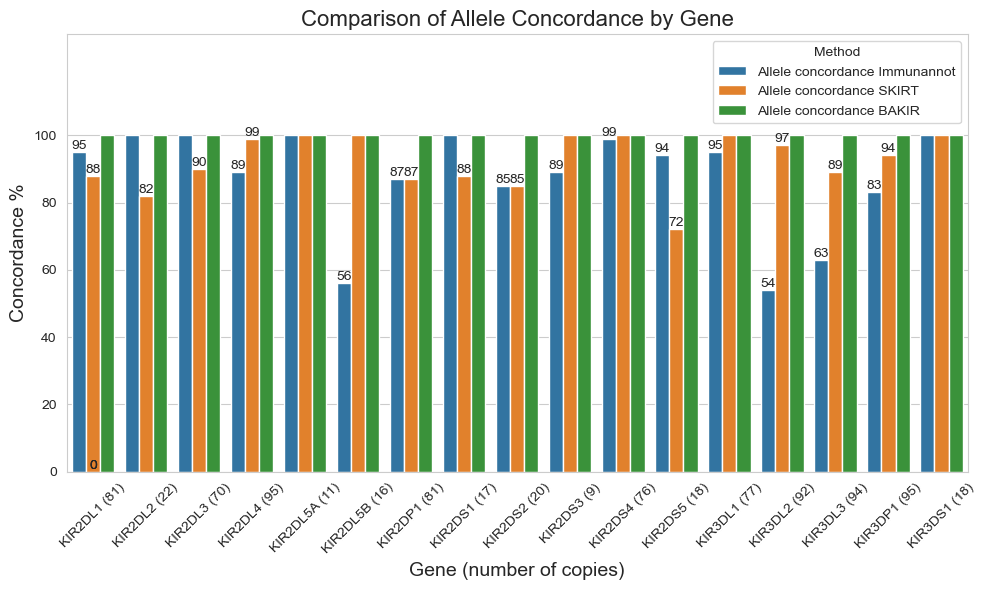

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Assuming 'paper_summary' is your DataFrame

# Step 3: Add a count value to gene labels
# Calculate the minimum count value
paper_summary['Min Copies'] = paper_summary[['BAKIR copies', 'Immuannot copies', 'SKIRT copies']].min(axis=1)
# Create a new column for modified gene labels
paper_summary['Gene Label'] = paper_summary.apply(lambda x: f"{x['gene']} ({x['Min Copies']})", axis=1)

# Add the new category with a constant value of 100
paper_summary['Allele concordance BAKIR'] = 100

# Transform the DataFrame to long format for plotting
paper_summary_long = pd.melt(paper_summary, 
                             id_vars=['Gene Label'], 
                             value_vars=['Allele concordance Immunannot', 'Allele concordance SKIRT', 'Allele concordance BAKIR'],
                             var_name='Method', 
                             value_name='Concordance %')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Customize the size as needed
sns.barplot(x='Gene Label', y='Concordance %', hue='Method', data=paper_summary_long, ax=ax)

# Customizations
ax.set_xlabel('Gene')  # X-axis Label
ax.set_ylabel('Concordance %')  # Y-axis Label
ax.set_title('Allele Concordance by Gene')  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for bar in ax.patches:
    # Get the bar's height, width, and position
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height
    if height < 100:
        # Use ax.text to add the text above the bar
        # You can adjust the vertical alignment and position to better fit your aesthetics
        ax.text(x, y, f'{round(height)}', ha='center', va='bottom')


# Step 1: Add grey grid in the background
# ax.grid(True)  # Add grid

# Step 2: Adjust the y-axis
ax.set_ylim(0, 130)  # Increase y-axis limit to make room for legend (ticks not going past 100)
y_ticks = [0, 20, 40, 60, 80, 100]  # Adjust this list based on your needs
ax.set_yticks(y_ticks)

ax.set_xlabel('Gene (number of copies)', fontsize=14)
ax.set_ylabel('Concordance %', fontsize=14)  # Increase y-axis label size

ax.set_title('Comparison of Allele Concordance by Gene', fontsize=16)

plt.legend(title='Method', loc='upper right')  # Move legend to the top right

plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()

fig.savefig('gene_allele_comparison.png', dpi=350)


In [24]:
summary['kir_annots copies'].sum()

np.int64(894)

In [25]:
summary['imm_annots copies'].sum()

np.int64(894)

In [26]:
summary['num allele call diffs'].sum()

np.int64(62)

## Make example case figure

In [27]:
from comparison_functions import make_annotation_matches, group_annotations_by_gene, view_alignment, analyze_sample_gene_discordance

for k in dfs:
    diff_cnv = dfs[k][dfs[k]['kir_annots copies'] != dfs[k]['imm_annots copies']]
    diff_a = dfs[k][dfs[k]['num allele call diffs'] > 0]
    
    genes = list(diff_cnv['gene']) + list(diff_a['gene'])
    if genes:
        for g in genes:
            if not (k == 'HG02630.maternal' and g == 'KIR2DL4'):
                continue
            md(f"### {k} - {g}")
            display(dfs[k][dfs[k]['gene'] == g])
            closest_alleles, v, fv = analyze_sample_gene_discordance(k, g, db)
            b = True

### HG02630.maternal - KIR2DL4

,gene,kir_annots copies,imm_annots copies,num position diffs,num strand diffs,position diffs,num allele call diffs,allele diffs
3,KIR2DL4,1,1,0,0,[],1.0,"[(01201, 0050101)]"


#### Discordant alleles: KA = 01201, Immunanot = 0050101

Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpgmbhjp7l -OUTFILE=/tmp/tmpycwwxxlu -OUTPUT=CLUSTAL
Saving plot as PNG to None


Bokeh(figure)

,closest allele,common mut,new mut,missing mut,missing functional mut,new functional mut,jaccard functional distance,jaccard distance,MSA edit distance
0,KIR2DL4*01201,5,44,0,{},{},0.00000,0.897959,86
1,KIR2DL4*0050101,31,18,9,{},"{(10521, C>G)}",0.00813,0.465517,23


In [28]:
from comparison_functions import latex_table

latex_table(('Tool', 
             'Allele call', 
             'Global Edit distance', 
             'Assembly missing F variants', 
             'Assembly new F variants', 
             'Hamming functional distance'),
            [('KIR-Annotator', 'KIR2DL4*01201', 86, None, None, 0.00),
            ('Immunannot', 'KIR2DL4*0050101', 23, '(10521, C>G)', None, 0.00813)])

\hline
Tool                 & Allele call          & Global Edit distance & Assembly missing F variants & Assembly new F variants & Hamming functional distance\\
\hline
KIR-Annotator        & KIR2DL4*01201        & 86                   & None                 & None                 & 0.0                 \\
Immunannot           & KIR2DL4*0050101      & 23                   & (10521, C>G)         & None                 & 0.00813             \\
\hline


## Make supplementary comparison table

In [30]:
from glob import glob
import os
import pandas as pd
from comparison_functions import load_skirt_data

# Initialize a dictionary to store DataFrames
dfs_s = {}

for assembly in glob("HPRC-assemblies-annotations/*/*.*.f1_assembly_v2.yaml"):
    bakir = load_bakir_data(assembly)
    sample_prefix = os.path.basename(assembly).split('.f1')[0]
    skirt = load_skirt_data(glob(f'HPRC-Skirt-annotations/{sample_prefix}/{sample_prefix}*allele.csv')[0])
    df = compare_bakir_immunanot(bakir, skirt)
    
    # Store the DataFrame in the dictionary with imm_prefix as the key
    dfs_s[sample_prefix] = df
